In [1]:
using DrWatson
@quickactivate "MEngProject"
using MEngProject, CUDA, DifferentialEquations, PyPlot, NNlib,  ImageFiltering, Images, MEngProject, MEngProject.LamKernels, MEngProject.Laminart, MEngProject.Utils, BenchmarkTools, Test

┌ Info: Precompiling MEngProject [d0493a11-efc0-4c7c-9b66-d0bd5a04cc55]
└ @ Base loading.jl:1260


In [2]:
function reshape2d_4d(img::AbstractArray)
    reshape(img, size(img)[1], size(img)[2], 1, 1)
end

reshape2d_4d (generic function with 1 method)

In [3]:
img = convert(Array{Float32,2}, load(datadir("Iine_100_100_gs.png")));
img = reshape2d_4d(img)
img = cu(img)
r = similar(img)

p = LaminartGPU.kernels(img, Parameters.parameters);

LaminartGPU.I_u!(r, img, p)
temp_out = (I = img, r = r)
p = merge(p, temp_out);

In [4]:
tspan = (0.0f0, 5f0)
u0 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j*(5*p.K+2)), p.dim_i, p.dim_j, 5*p.K+2,1));

In [5]:
x_lgn = cu(reshape(zeros(Float32, p.dim_i, p.dim_j), p.dim_i, p.dim_j, 1,1))
C = cu(reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K,1))
H_z = cu(reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K,1));
V_temp_1 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j), p.dim_i, p.dim_j, 1,1));
V_temp_2 = cu(reshape(zeros(Float32, p.dim_i, p.dim_j), p.dim_i, p.dim_j, 1,1));
Q_temp = cu(reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K,1));
P_temp = cu(reshape(zeros(Float32, p.dim_i, p.dim_j * p.K), p.dim_i, p.dim_j, p.K,1));

In [6]:
f = LaminartGPU.MyFunction(x_lgn, C, H_z, V_temp_1, V_temp_2, Q_temp, P_temp)

UndefVarError: UndefVarError: MyFunction not defined

In [7]:
arr1 = u0[:, :, 1:p.K,:]
arr2 = u0[:, :, 1:1,:];

In [8]:
f = LaminartGPU.MyFunctionnn(
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr2),
    similar(arr2),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr2),
    similar(arr2),
    x_lgn, C, H_z, V_temp_1, V_temp_2, Q_temp, P_temp);

In [9]:
prob= ODEProblem(f, u0, tspan, p);

In [10]:
sol = solve(prob)

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 905-element Array{Float32,1}:
 0.0
 1.0f-6
 6.4444416f-6
 2.4450192f-5
 6.62239f-5
 0.00014112459
 0.00025240338
 0.00040083917
 0.00059357367
 0.000836073
 0.00113282
 0.001486989
 0.0019003447
 ⋮
 4.732325
 4.756958
 4.781688
 4.8065157
 4.8314404
 4.8564625
 4.881582
 4.906798
 4.932111
 4.9575205
 4.9830265
 5.0
u: 905-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 907-element Array{Float32,1}:
 0.0
 1.0f-6
 5.349429f-6
 1.7518434f-5
 4.247656f-5
 8.335372f-5
 0.00014018873
 0.00021520964
 0.00031122
 0.00043049853
 0.0005748033
 0.00074527995
 0.0009424369
 ⋮
 4.739772
 4.763352
 4.786976
 4.810644
 4.8343563
 4.858113
 4.881913
 4.905757
 4.9296446
 4.953576
 4.9775515
 5.0
u: 907-element Array{CuArray{Float32,4,Nothing},1}:
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

...

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]
 [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.

In [141]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  6.66 GiB
  allocs estimate:  43308295
  --------------
  minimum time:     38.744 s (2.52% GC)
  median time:      38.744 s (2.52% GC)
  mean time:        38.744 s (2.52% GC)
  maximum time:     38.744 s (2.52% GC)
  --------------
  samples:          1
  evals/sample:     1

In [11]:
@benchmark sol = solve(prob)

BenchmarkTools.Trial: 
  memory estimate:  6.67 GiB
  allocs estimate:  43545316
  --------------
  minimum time:     37.040 s (2.46% GC)
  median time:      37.040 s (2.46% GC)
  mean time:        37.040 s (2.46% GC)
  maximum time:     37.040 s (2.46% GC)
  --------------
  samples:          1
  evals/sample:     1

In [155]:
u

Error During Test at In[155]:1
  Test threw exception
  Expression: sol ≈ sol1
  Out of GPU memory trying to allocate 468.750 KiB
  Effective GPU memory usage: 100.00% (11.172 GiB/11.172 GiB)
  CUDA allocator usage: 10.969 GiB
  BinnedPool usage: 10.969 GiB (10.969 GiB allocated, 0 bytes cached)
  
  Stacktrace:
   [1] alloc at /mnt/storage_1/users/cullinanen/.julia/packages/CUDA/h38pe/src/memory.jl:227 [inlined]
   [2] CuArray{Float32,4,P} where P(::UndefInitializer, ::NTuple{4,Int64}) at /mnt/storage_1/users/cullinanen/.julia/packages/CUDA/h38pe/src/array.jl:119
   [3] CuArray at /mnt/storage_1/users/cullinanen/.julia/packages/CUDA/h38pe/src/array.jl:127 [inlined]
   [4] similar at ./abstractarray.jl:671 [inlined]
   [5] similar at ./abstractarray.jl:670 [inlined]
   [6] similar at /mnt/storage_1/users/cullinanen/.julia/packages/CUDA/h38pe/src/broadcast.jl:11 [inlined]
   [7] copy(::Base.Broadcast.Broadcasted{CUDA.CuArrayStyle{4},Nothing,typeof(-),Tuple{CuArray{Float32,4,Nothing},CuA

Test.FallbackTestSetException: There was an error during testing

In [156]:
solcpu= Array(sol)

OutOfGPUMemoryError: Out of GPU memory trying to allocate 415.192 MiB
Effective GPU memory usage: 98.96% (11.055 GiB/11.172 GiB)
CUDA allocator usage: 10.853 GiB
BinnedPool usage: 10.853 GiB (10.853 GiB allocated, 0 bytes cached)


In [98]:
@code_warntype LaminartGPU.MyFunctionnn(
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr2),
    similar(arr2),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr1),
    similar(arr2),
    similar(arr2),
    x_lgn, C, H_z, V_temp_1, V_temp_2, Q_temp, P_temp)

Variables
  #self#::Type{MEngProject.LaminartGPU.MyFunctionnn}
  x::CuArray{Float32,4,Nothing}
  y::CuArray{Float32,4,Nothing}
  m::CuArray{Float32,4,Nothing}
  z::CuArray{Float32,4,Nothing}
  s::CuArray{Float32,4,Nothing}
  v_p::CuArray{Float32,4,Nothing}
  v_m::CuArray{Float32,4,Nothing}
  dx::CuArray{Float32,4,Nothing}
  dy::CuArray{Float32,4,Nothing}
  dm::CuArray{Float32,4,Nothing}
  dz::CuArray{Float32,4,Nothing}
  ds::CuArray{Float32,4,Nothing}
  dv_p::CuArray{Float32,4,Nothing}
  dv_m::CuArray{Float32,4,Nothing}
  x_lgn::CuArray{Float32,4,Nothing}
  C::CuArray{Float32,4,Nothing}
  H_z::CuArray{Float32,4,Nothing}
  V_temp_1::CuArray{Float32,4,Nothing}
  V_temp_2::CuArray{Float32,4,Nothing}
  Q_temp::CuArray{Float32,4,Nothing}
  P_temp::CuArray{Float32,4,Nothing}

Body::MEngProject.LaminartGPU.MyFunctionnn{CuArray{Float32,4,Nothing}}
1 ─ %1 = Core.apply_type(MEngProject.LaminartGPU.MyFunctionnn, $(Expr(:static_parameter, 1)))::Core.Compiler.Const(MEngProject.LaminartGPU.MyFunctio

In [157]:
CUDA.device_reset!(dev::CuDevice=device())

ErrorException: syntax: invalid keyword argument name "dev::CuDevice"

In [75]:
f

(::MEngProject.LaminartGPU.MyFunctionnn{CuArray{Float32,4,Nothing}}) (generic function with 1 method)

In [83]:
f.dv_m

100×100×1×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [84]:
x_ = @view u[:, :, 1:p.K,:]

100×100×2×1 view(::CuArray{Float32,4,Nothing}, :, :, 1:2, :) with eltype Float32:
[:, :, 1, 1] =
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4

In [85]:
f.x = CuArray(x_)

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0

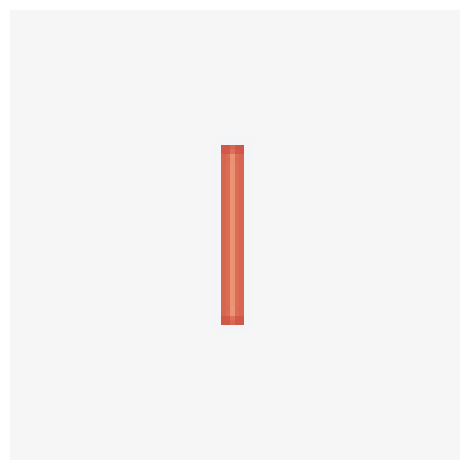

In [140]:
Utils.plot_rb(sol(1)[:,:,11,1])

## Try making struct to hold arrays eg f.x = x[:,:,:,:]
### first: BM how long that copy takes

In [15]:
mutable struct testtt
    y::AbstractArray
end

In [16]:
x= testtt(@view u0[:,:,1:2,:])

testtt(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [18]:
yy = @view u0[:,:,1:2,:]
yyy = yy[:,:,:,:]

┌ Warning: Performing scalar operations on GPU arrays: This is very slow, consider disallowing these operations with `allowscalar(false)`
└ @ GPUArrays /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/indexing.jl:43


100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [20]:
@benchmark x.y = yyy

BenchmarkTools.Trial: 
  memory estimate:  0 bytes
  allocs estimate:  0
  --------------
  minimum time:     142.113 ns (0.00% GC)
  median time:      148.258 ns (0.00% GC)
  mean time:        148.994 ns (0.00% GC)
  maximum time:     2.775 μs (0.00% GC)
  --------------
  samples:          10000
  evals/sample:     852

In [22]:
x.y

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [29]:
@benchmark begin
# x.y = @view u0[:,:,1:2,:]
x.y = yy[:,:,:,:]
end

BenchmarkTools.Trial: 
  memory estimate:  4.88 MiB
  allocs estimate:  120007
  --------------
  minimum time:     408.956 ms (0.00% GC)
  median time:      409.801 ms (0.00% GC)
  mean time:        410.540 ms (0.00% GC)
  maximum time:     412.819 ms (0.00% GC)
  --------------
  samples:          13
  evals/sample:     1

In [31]:

@benchmark begin
x.y = @view u0[:,:,1:2,:]
x.y = CuArray(x.y)
end

BenchmarkTools.Trial: 
  memory estimate:  82.63 KiB
  allocs estimate:  118
  --------------
  minimum time:     130.863 μs (0.00% GC)
  median time:      142.323 μs (0.00% GC)
  mean time:        150.177 μs (3.81% GC)
  maximum time:     18.104 ms (86.91% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [32]:
x.y

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [24]:
typeof(@view u0[:,:,1:2,:])

SubArray{Float32,4,CuArray{Float32,4,Nothing},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false}

In [36]:
typeof((@view u0[:,:,1:2,:])[:,:,:,:])

CuArray{Float32,4,Nothing}

In [39]:
xx = (@view u0[:,:,1:2,:])[:,:,:,:]
@. xx[:,:,1,:] = 1 

100×100×1 view(::CuArray{Float32,4,Nothing}, :, :, 1, :) with eltype Float32:
[:, :, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0

In [37]:
@view u0[:,:,1:2,:][:,:,:,:]

100×100×2×1 CuArray{Float32,4,CuArray{Float32,4,Nothing}}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0 

In [40]:
xx

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  …  1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0     1.0  1.0  1.0  1.0  1.0  1.0  1.0
 1.0  1.0

In [41]:
u0[:,:,1:2,:]

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [33]:
mutable struct testta
    ya::AbstractArray
    yb::AbstractArray
end

In [43]:
yaa = @view u0[:,:,1:2,:]
yba = CuArray(yaa)
x = testta(yaa, yba)

testta(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0]

Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0])

In [44]:
x.ya

100×100×2×1 view(::CuArray{Float32,4,Nothing}, :, :, 1:2, :) with eltype Float32:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0

In [45]:
x.yb

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0

In [46]:
@. x.yb[:,:,1,:] = 3f0

100×100×1 view(::CuArray{Float32,4,Nothing}, :, :, 1, :) with eltype Float32:
[:, :, 1] =
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0

In [47]:
x.yb

100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0

In [48]:
x.ya

100×100×2×1 view(::CuArray{Float32,4,Nothing}, :, :, 1:2, :) with eltype Float32:
[:, :, 1, 1] =
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0

In [49]:
@. x.ya = x.yb

100×100×2×1 view(::CuArray{Float32,4,Nothing}, :, :, 1:2, :) with eltype Float32:
[:, :, 1, 1] =
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3

In [50]:
x.ya

100×100×2×1 view(::CuArray{Float32,4,Nothing}, :, :, 1:2, :) with eltype Float32:
[:, :, 1, 1] =
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0  …  3.0  3.0  3.0  3.0  3.0  3.0  3.0
 3.0  3.0  3.0  3.0  3.0  3.0  3.0  3.0     3

In [51]:
@benchmark begin
    x.ya = @view u0[:,:,1:2,:]
    x.yb = x.ya[:,:,:,:]
    @. x.yb = 4f0
    @. x.ya = x.yb
end

BenchmarkTools.Trial: 
  memory estimate:  4.89 MiB
  allocs estimate:  120153
  --------------
  minimum time:     409.163 ms (0.00% GC)
  median time:      412.406 ms (0.00% GC)
  mean time:        411.980 ms (0.00% GC)
  maximum time:     415.237 ms (0.00% GC)
  --------------
  samples:          13
  evals/sample:     1

In [56]:
@benchmark begin
    x.ya = @view u0[:,:,1:2,:]
    x.yb = CuArray(x.ya)
    @. x.yb = 4f0
    @. x.ya = x.yb
end

BenchmarkTools.Trial: 
  memory estimate:  88.44 KiB
  allocs estimate:  260
  --------------
  minimum time:     251.532 μs (0.00% GC)
  median time:      259.317 μs (0.00% GC)
  mean time:        274.854 μs (2.76% GC)
  maximum time:     20.688 ms (86.99% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [54]:
@benchmark begin
    x.ya = @view u0[:,:,1:2,:]
    @. x.yb = CuArray(x.ya)
    @. x.yb = 4f0
    @. x.ya = x.yb
end

GPUCompiler.InvalidIRError: InvalidIRError: compiling kernel broadcast(CUDA.CuKernelContext, CuDeviceArray{Float32,4,CUDA.AS.Global}, Base.Broadcast.Broadcasted{Nothing,NTuple{4,Base.OneTo{Int64}},CUDA.var"#869#870"{CuArray},Tuple{Base.Broadcast.Extruded{SubArray{Float32,4,CuDeviceArray{Float32,4,CUDA.AS.Global},Tuple{Base.Slice{Base.OneTo{Int64}},Base.Slice{Base.OneTo{Int64}},UnitRange{Int64},Base.Slice{Base.OneTo{Int64}}},false},NTuple{4,Bool},NTuple{4,Int64}}}}) resulted in invalid LLVM IR
Reason: unsupported dynamic function invocation (call to CuArray)
Stacktrace:
 [1] #869 at /mnt/storage_1/users/cullinanen/.julia/packages/CUDA/h38pe/src/broadcast.jl:21
 [2] _broadcast_getindex_evalf at broadcast.jl:631
 [3] _broadcast_getindex at broadcast.jl:604
 [4] getindex at broadcast.jl:564
 [5] #20 at /mnt/storage_1/users/cullinanen/.julia/packages/GPUArrays/4W5rW/src/host/broadcast.jl:59

In [60]:
@benchmark begin
    yana = @view u0[:,:,1:2,:]
    ybna = CuArray(yana)
    @. ybna = 4f0
    @. yana = ybna
end

BenchmarkTools.Trial: 
  memory estimate:  88.44 KiB
  allocs estimate:  260
  --------------
  minimum time:     248.654 μs (0.00% GC)
  median time:      255.185 μs (0.00% GC)
  mean time:        270.580 μs (2.82% GC)
  maximum time:     20.654 ms (86.83% GC)
  --------------
  samples:          10000
  evals/sample:     1

In [61]:
yanaa = @view u0[:,:,1:2,:]
@time  ybnc = CuArray(yanaa)

  0.000742 seconds (117 allocations: 85.938 KiB)


100×100×2×1 CuArray{Float32,4,Nothing}:
[:, :, 1, 1] =
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0  …  4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0  4.0  4.0  4.0  4.0  4.0  4.0     4.0  4.0  4.0  4.0  4.0  4.0  4.0
 4.0  4.0